In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [17]:
df = pd.read_csv('creditcard.csv')

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df.shape

(284807, 31)

In [20]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

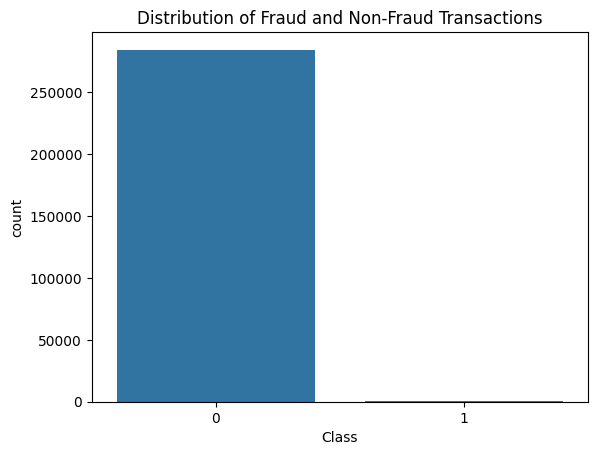

In [21]:
# Explore the target variable (Class column)
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.show()

Note: The dataset is highly imbalanced, with fraudulent transactions (Class=1) being much fewer than non-fraudulent transactions (Class=0).

In [22]:
# Preprocessing data
# Standardizing the data
scaler = StandardScaler()
df_scaled = df.drop('Class', axis=1)  # Drop the target column for scaling
df_scaled = scaler.fit_transform(df_scaled)

# Add the target column back to the scaled dataset
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['Class'] = df['Class']

In [23]:
# Train-test split
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

d:\Fraud Detection System\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [ ]:
# Model training
model = RandomForestClassifier(random_state=42, n_estimators=10)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=10, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.81      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



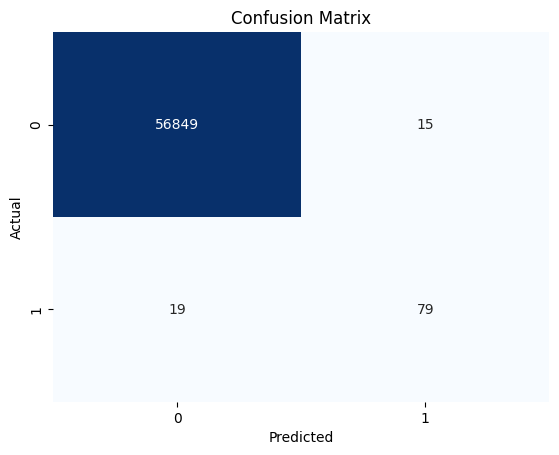

ROC-AUC Score: 0.9576083071101259


In [29]:
# Model evaluation
# Predictions
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
print('ROC-AUC Score:', roc_auc_score(y_test, y_prob))